In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
while 'notebooks' in os.getcwd():
    os.chdir('..')

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

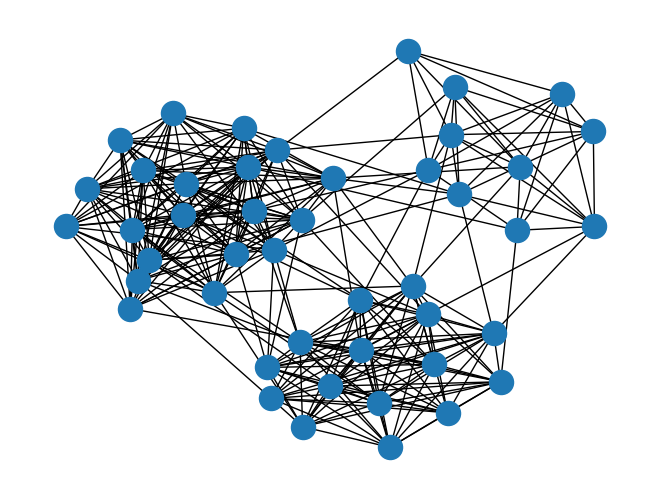

In [14]:
sizes = [10, 20, 15]

probs = [[0.80, 0.05, 0.02], [0.05, 0.80, 0.07], [0.02, 0.07, 0.90]]

graph = nx.stochastic_block_model(sizes, probs, seed=0)
nx.draw_kamada_kawai(graph)

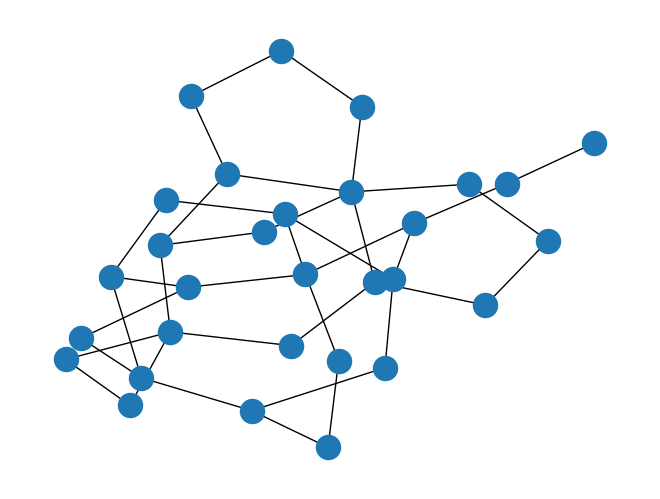

In [129]:
n = 30
tau1 = 5
tau2 = 1.1
mu = 0.01
min_degree = 2
min_community = 15
max_community = 15
seed = 0

graph = nx.LFR_benchmark_graph(
    n,
    tau1,
    tau2,
    mu,
    min_degree=min_degree,
    min_community=min_community,
    max_community=max_community,
    seed=seed
)
graph.remove_edges_from(list(nx.selfloop_edges(graph)))
nx.draw_kamada_kawai(graph)


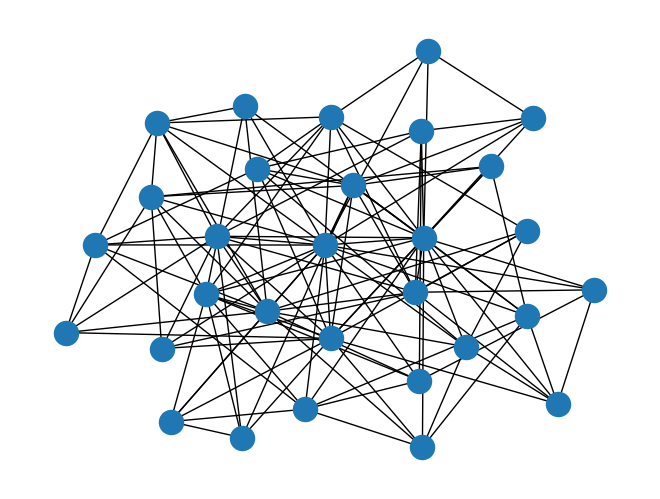

In [136]:
n = 30
m = 5
p = 0.2
seed = 0

graph = nx.powerlaw_cluster_graph(
    n,
    m,
    p,
    seed=seed
)
graph.remove_edges_from(list(nx.selfloop_edges(graph)))
nx.draw_kamada_kawai(graph)


In [133]:
graph.nodes()[5]

{'community': {0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 19, 27}}

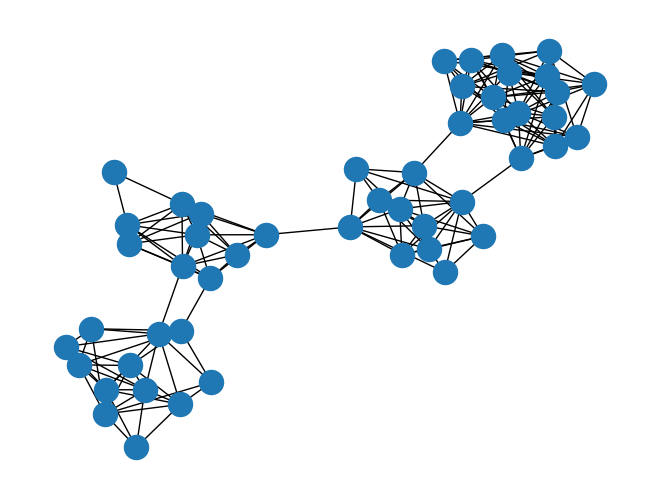

In [138]:
n = 50
s = 15
v = 6
p_in = 0.6
p_out = 0.01
seed = 0

graph = nx.gaussian_random_partition_graph(
    n=n,
    s=s,
    v=v,
    p_in=p_in,
    p_out=p_out,
    seed=seed,
)
graph.remove_edges_from(list(nx.selfloop_edges(graph)))
nx.draw_kamada_kawai(graph)


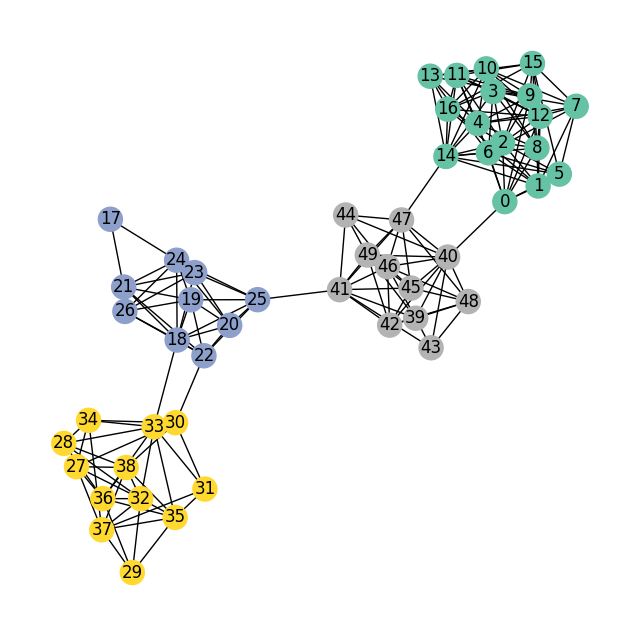

In [139]:
pos = nx.kamada_kawai_layout(graph)

node_classes_hom = [graph.nodes[v]["block"] for v in graph]
class_dict = dict(zip(graph.nodes(), node_classes_hom))

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

nx.draw_networkx(
    graph,
    pos=pos,
    with_labels=True,
    node_color=node_classes_hom,
    cmap='Set2',
    ax=ax)

ax.set_axis_off()

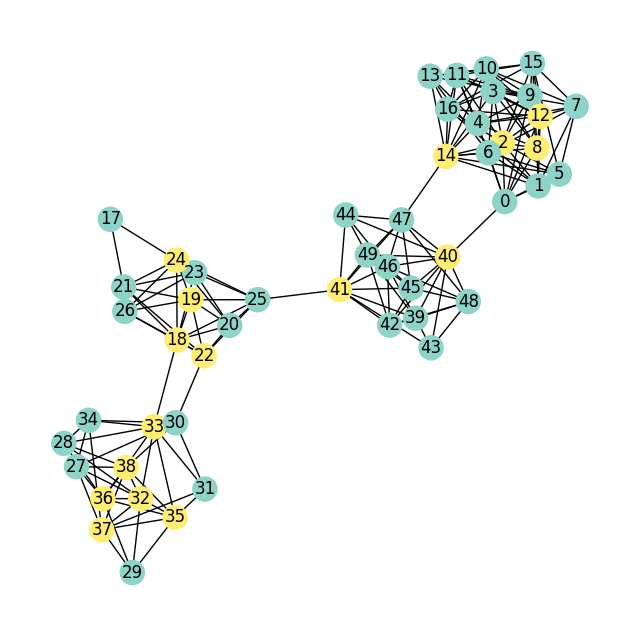

In [157]:
pos = nx.kamada_kawai_layout(graph)

pr = nx.pagerank(graph, alpha=0.9)
node_classes_het = [int(pr[v] > 0.022) for v in graph]
class_dict = dict(zip(graph.nodes(), node_classes_hom))

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

nx.draw_networkx(
    graph,
    pos=pos,
    with_labels=True,
    node_color=node_classes_het,
    cmap='Set3',
    ax=ax)

ax.set_axis_off()

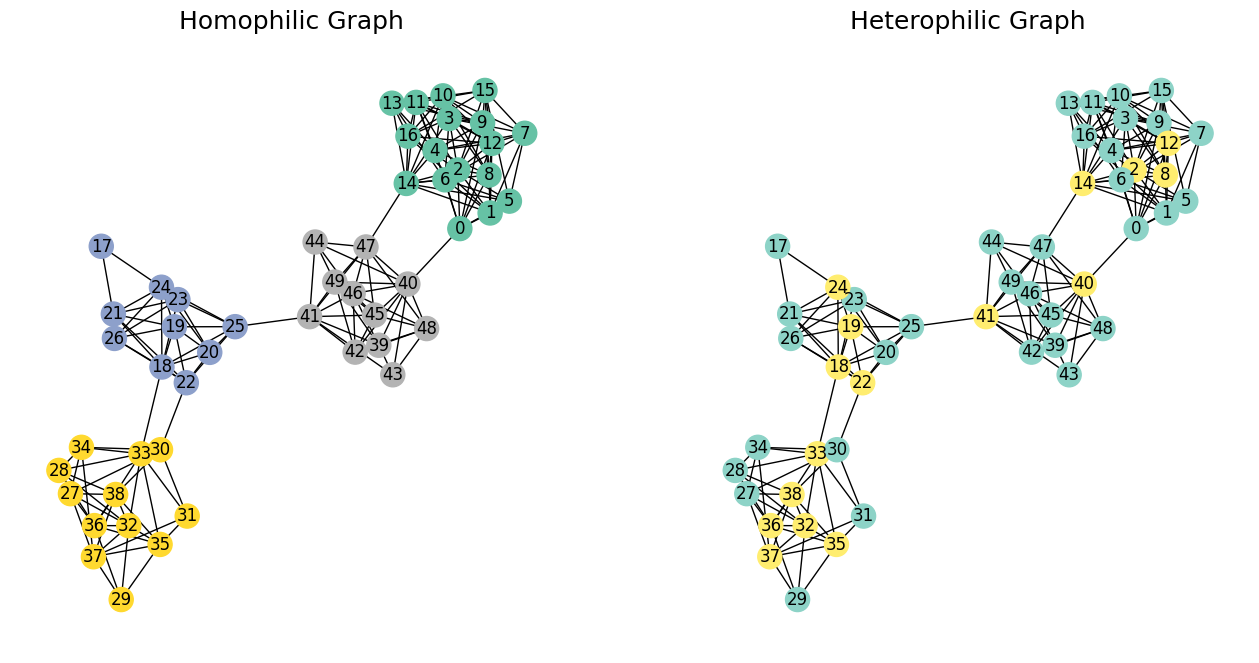

In [155]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 8))

nx.draw_networkx(
    graph,
    pos=pos,
    with_labels=True,
    node_color=node_classes_hom,
    cmap='Set2',
    ax=ax0)

ax0.set_axis_off()

ax0.set_title('Homophilic Graph', fontdict={"size": 18})


nx.draw_networkx(
    graph,
    pos=pos,
    with_labels=True,
    node_color=node_classes_het,
    cmap='Set3',
    ax=ax1)

ax1.set_axis_off()
ax1.set_title('Heterophilic Graph', fontdict={"size": 18})

plt.savefig('reports/images/homophilic_vs_heterophilic_example_v2.pdf')